In [1]:
!pip install pyrdf2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.2 MB/s eta 0:00:00
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp310-cp310-linux_x86_64.whl size=159972 sha256

In [2]:
pip install rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.6 MB/s eta 0:00:00


In [3]:
import pandas as pd

from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs import KG
from pyrdf2vec.walkers import RandomWalker

In [4]:
# Step 1: Upload and read the countries.csv dataset
import rdflib
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('countries.csv')
entities = [entity for entity in data["Country"]]

print("Entities to process:", entities)

Saving countries.csv to countries.csv
Entities to process: ['http://dbpedia.org/resource/Afghanistan', 'http://dbpedia.org/resource/Albania', 'http://dbpedia.org/resource/Algeria', 'http://dbpedia.org/resource/Angola', 'http://dbpedia.org/resource/Antigua_and_Barbuda', 'http://dbpedia.org/resource/Armenia', 'http://dbpedia.org/resource/Australia', 'http://dbpedia.org/resource/Austria', 'http://dbpedia.org/resource/Azerbaijan', 'http://dbpedia.org/resource/Bahrain', 'http://dbpedia.org/resource/Bangladesh', 'http://dbpedia.org/resource/Barbados', 'http://dbpedia.org/resource/Belarus', 'http://dbpedia.org/resource/Belgium', 'http://dbpedia.org/resource/Belize', 'http://dbpedia.org/resource/Benin', 'http://dbpedia.org/resource/Bhutan', 'http://dbpedia.org/resource/Bolivia', 'http://dbpedia.org/resource/Bosnia_and_Herzegovina', 'http://dbpedia.org/resource/Botswana', 'http://dbpedia.org/resource/Brazil', 'http://dbpedia.org/resource/Brunei_Darussalam', 'http://dbpedia.org/resource/Bulgaria

In [5]:


# We will exclude triples (s, p, o) with p in label_predicates from our KG
# as these do not carry any useful information.
label_predicates = [
     'http://dbpedia.org/ontology/abstract',
     'http://dbpedia.org/ontology/flag',
     'http://dbpedia.org/ontology/thumbnail',
     'http://dbpedia.org/ontology/wikiPageExternalLink',
     'http://dbpedia.org/ontology/wikiPageID',
     'http://dbpedia.org/ontology/wikiPageRevisionID',
     'http://dbpedia.org/ontology/wikiPageWikiLink',
     'http://dbpedia.org/property/flagCaption',
     'http://dbpedia.org/property/float',
     'http://dbpedia.org/property/footnoteA',
     'http://dbpedia.org/property/footnoteB',
     'http://dbpedia.org/property/footnoteC',
     'http://dbpedia.org/property/source',
     'http://dbpedia.org/property/width',
     'http://purl.org/dc/terms/subject',
     'http://purl.org/linguistics/gold/hypernym',
     'http://purl.org/voc/vrank#hasRank',
     'http://www.georss.org/georss/point',
     'http://www.w3.org/2000/01/rdf-schema#comment',
     'http://www.w3.org/2000/01/rdf-schema#label',
     'http://www.w3.org/2000/01/rdf-schema#seeAlso',
     'http://www.w3.org/2002/07/owl#sameAs',
     'http://www.w3.org/2003/01/geo/wgs84_pos#geometry',
     'http://dbpedia.org/ontology/wikiPageRedirects',
     'http://www.w3.org/2003/01/geo/wgs84_pos#lat',
     'http://www.w3.org/2003/01/geo/wgs84_pos#long',
     'http://www.w3.org/2004/02/skos/core#exactMatch',
     'http://www.w3.org/ns/prov#wasDerivedFrom',
     'http://xmlns.com/foaf/0.1/depiction',
     'http://xmlns.com/foaf/0.1/homepage',
     'http://xmlns.com/foaf/0.1/isPrimaryTopicOf',
     'http://xmlns.com/foaf/0.1/name',
     'http://dbpedia.org/property/website',
     'http://dbpedia.org/property/west',
     'http://dbpedia.org/property/wordnet_type',
     'http://www.w3.org/2002/07/owl#differentFrom',
]

# KG Loading Alternative 2: Using a dbpedia endpoint (nothing is loaded into memory)
kg = KG("https://dbpedia.org/sparql", is_remote=True,
        skip_predicates=[rdflib.URIRef(x) for x in label_predicates])

# Make sure that every entity can be found in our KG
filtered_entities = [e for e in entities if e in kg._entities]
not_found = set(entities) - set(filtered_entities)
print(f'{not_found} could not be found in the KG! Removing them...')


{'http://dbpedia.org/resource/Togo', 'http://dbpedia.org/resource/Papua_New_Guinea', 'http://dbpedia.org/resource/Guyana', 'http://dbpedia.org/resource/Belgium', 'http://dbpedia.org/resource/India', 'http://dbpedia.org/resource/Malta', 'http://dbpedia.org/resource/Tunisia', 'http://dbpedia.org/resource/Russian_Federation', 'http://dbpedia.org/resource/Ghana', 'http://dbpedia.org/resource/Portugal', 'http://dbpedia.org/resource/Ukraine', 'http://dbpedia.org/resource/Montenegro', 'http://dbpedia.org/resource/Tanzania', 'http://dbpedia.org/resource/Cabo_Verde', 'http://dbpedia.org/resource/Panama', 'http://dbpedia.org/resource/Ireland', 'http://dbpedia.org/resource/Solomon_Islands', 'http://dbpedia.org/resource/Mongolia', 'http://dbpedia.org/resource/Brunei_Darussalam', 'http://dbpedia.org/resource/Iraq', 'http://dbpedia.org/resource/Afghanistan', 'http://dbpedia.org/resource/Italy', 'http://dbpedia.org/resource/Albania', 'http://dbpedia.org/resource/Australia', 'http://dbpedia.org/resour

In [6]:
import numpy as np

transformer = RDF2VecTransformer(
    Word2Vec(epochs=10),
    walkers=[RandomWalker(4, 10, with_reverse=False, n_jobs=2)],
    # verbose=1
)
# Get our embeddings.
embeddings, literals = transformer.fit_transform(kg, entities)


print(len(entities), np.array(embeddings).shape)

160 (160, 100)


In [7]:
X_embeddings = np.array(embeddings)
X_embeddings.shape

(160, 100)

In [8]:
pip install adjustText

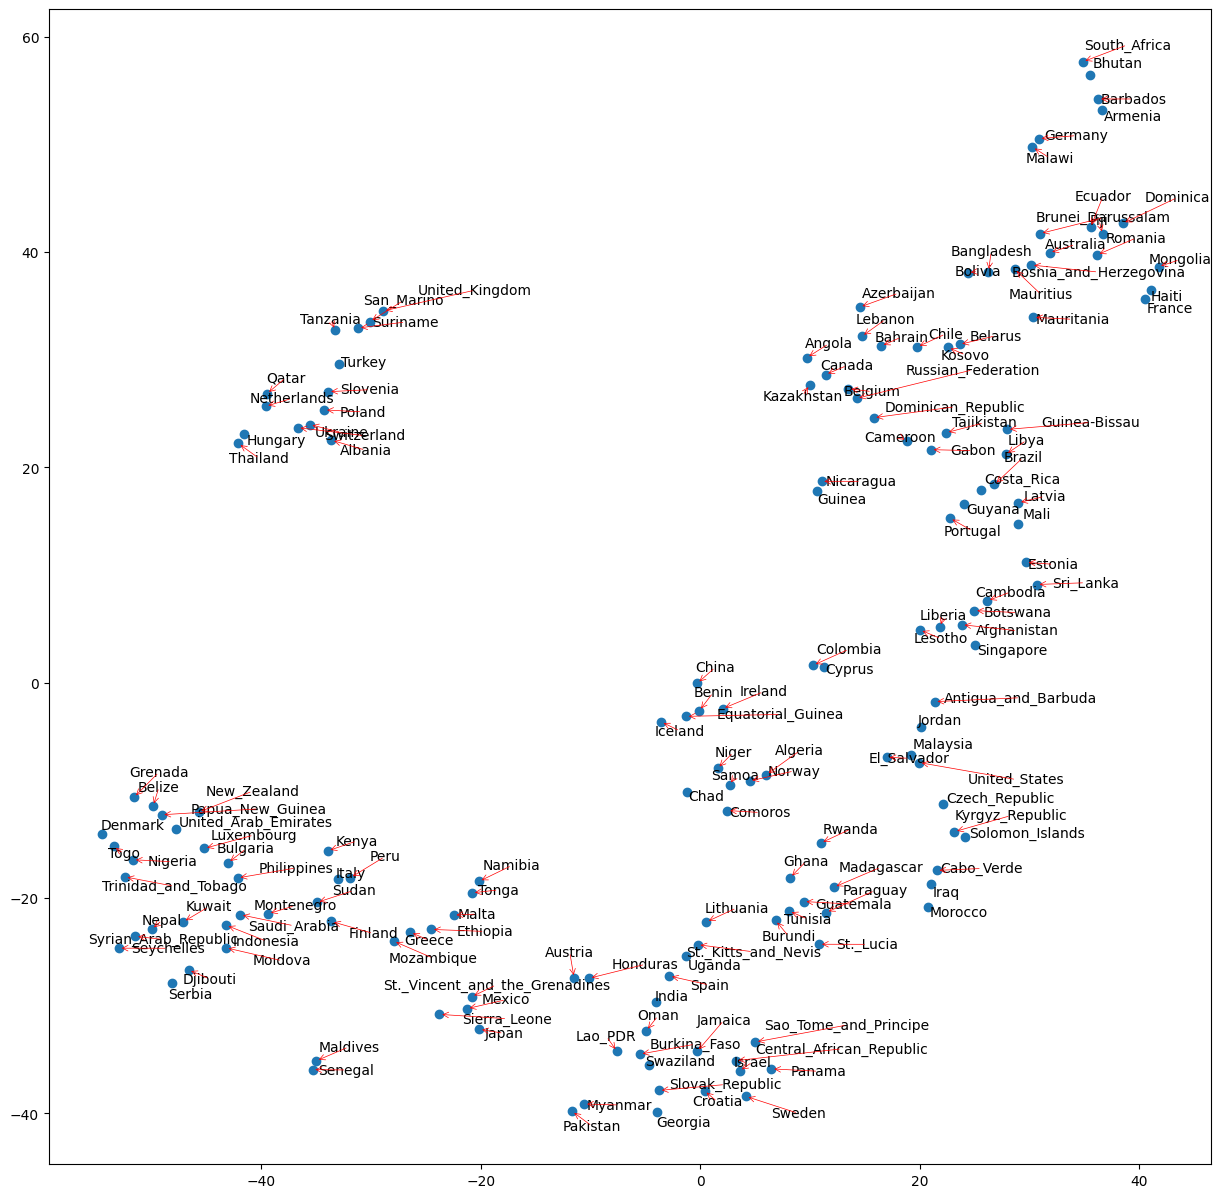

In [9]:
# used for dimension reduction and visualization
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from adjustText import adjust_text

walk_tsne = TSNE(random_state=42, perplexity=3)
X_tsne = walk_tsne.fit_transform(X_embeddings)

plt.figure(figsize=(15, 15))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

texts = []
for x, y, lab in zip(X_tsne[:, 0], X_tsne[:, 1], entities):
    lab = lab.split('/')[-1]
    text = plt.text(x, y, lab)
    texts.append(text)

adjust_text(texts, lim=5, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
plt.show()

# Embeddings are represented as numeric vectors, they can be directly used as input to K-Means clustering.

In [10]:
!pip install pyrdf2vec rdflib scikit-learn matplotlib adjustText


**Perform K-Means Clustering**

***Full k-means***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


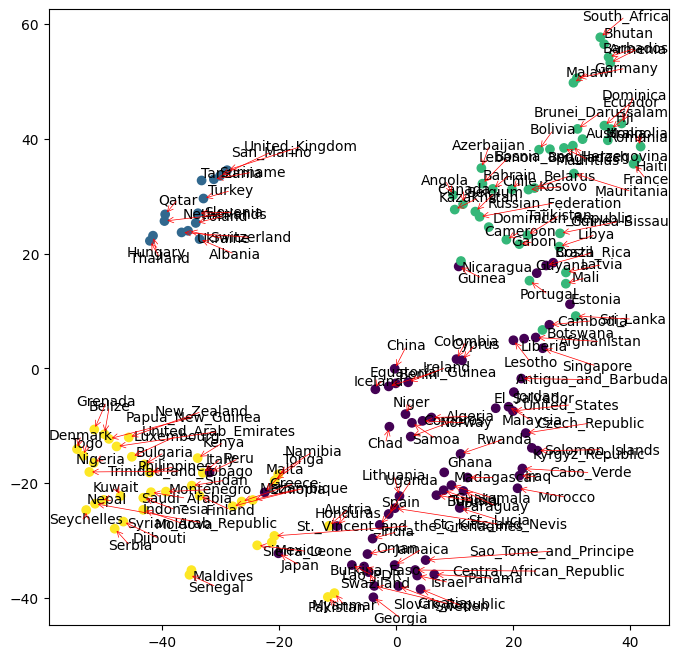

In [14]:
# Install necessary packages
!pip install pyrdf2vec rdflib scikit-learn matplotlib adjustText

# Import libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from adjustText import adjust_text

# Assuming X_embeddings contains the embeddings generated by RDF2Vec
# X_embeddings = np.array(embeddings)  # Make sure you generate embeddings

# Perform K-Means clustering
n_clusters = 4  # You can change this number based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_embeddings)
labels = kmeans.labels_

# Apply t-SNE for visualization
tsne = TSNE(random_state=42, perplexity=3)
X_tsne = tsne.fit_transform(X_embeddings)

# Plot the clustered embeddings
plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')

# Add labels to the points
texts = []
for x, y, label, entity in zip(X_tsne[:, 0], X_tsne[:, 1], labels, entities):
    entity_name = entity.split('/')[-1]
    text = plt.text(x, y, entity_name)
    texts.append(text)

# Adjust text labels to avoid overlap
adjust_text(texts, lim=5, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# Show the plot
plt.show()


<ipython-input-15-688afa6dddb0>:22: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


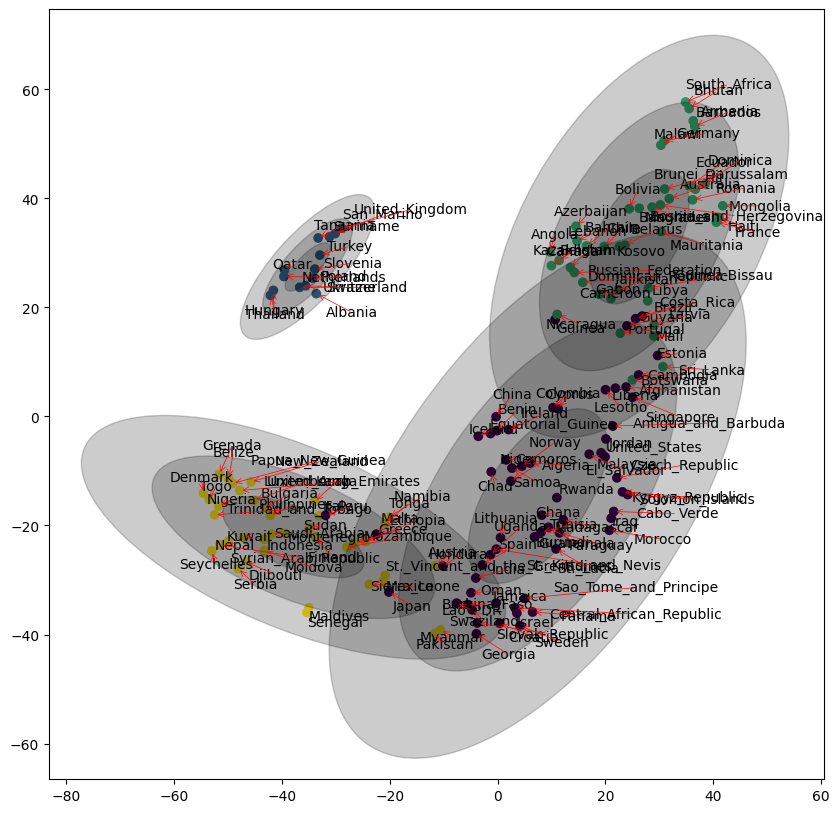

In [15]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from adjustText import adjust_text
from matplotlib.patches import Ellipse

# Function to draw an ellipse around clusters
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):  # 1 to 3 standard deviations
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

# Generate t-SNE embeddings for visualization
tsne = TSNE(random_state=42, perplexity=3)
X_tsne = tsne.fit_transform(X_embeddings)

# Plot the t-SNE scatter plot with clusters
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')

# Plot ellipses around clusters
for i in range(n_clusters):
    # Get the points for the current cluster
    points = X_tsne[labels == i]

    # Calculate mean and covariance matrix for the cluster
    mean = np.mean(points, axis=0)
    covariance = np.cov(points, rowvar=False)

    # Draw the ellipse
    draw_ellipse(mean, covariance, alpha=0.2, color='black')

# Add labels for each point
texts = []
for x, y, label, entity in zip(X_tsne[:, 0], X_tsne[:, 1], labels, entities):
    entity_name = entity.split('/')[-1]
    text = plt.text(x, y, entity_name)
    texts.append(text)

# Adjust text to avoid overlaps
adjust_text(texts, lim=5, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

# Show the plot
plt.show()
